# Engineering optical forces through Maxwell Stress Tensor inverse design: topology optimization of a particle in free-space

This notebook explains how to optimize the geometry of a particle to maximize the upwards force under plane-wave illumination. 

In [1]:
import sys
import os 

relative_path = "./../src/"
absolute_path = os.path.abspath(relative_path)

if absolute_path not in sys.path:
    sys.path.append(absolute_path)

In [2]:
import numpy as np
from solver import freq_top_opt_2D

### Geometric parameters

We start with some general geometric variables for the mesh:

In [3]:
r = 0.5 # mesh refinement factor: the larger the refinement factor, the finer the mesh.
scaling =  20e-9/r # the scale applied to the physical problem, all geometric values are given in units of this scaling.
fR = int(8*r) # value for the filtering radius   
nElx = int(r*200) + 2*fR # the number of elements in the X axis
nEly = int(r*100) + 2*fR # the number of elements in the Y axis\

Now we set the variables for the design region for the lens. Since we will just optimize the particle in this example, we set the initial guess to zero.

In [4]:
thickness = int(r*10) # the thickness of the design region for the lens, in number of elements in the Y direction
limit = int(np.floor((nEly-2*fR)*9/10))+fR # the lower limit of the design region, 0.9 * total height of the simulation volume
dVElmIdx = np.array([np.arange(limit-thickness,limit),np.arange(fR,nElx-fR)])  # the indexes of the domain of the  design variables
DVini = 0.0 * np.ones(len(dVElmIdx[0])*len(dVElmIdx[1])) # the initial value / guess for the design parameters

/tmp/ipykernel_105435/1213506299.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dVElmIdx = np.array([np.arange(limit-thickness,limit),np.arange(fR,nElx-fR)])  # the indexes of the domain of the  design variables


Now we do the same for the geometric variables for the particle:

In [5]:
center = [int(r*100)+ fR, int(r*40)+ fR] # the index for the geometric center of the particle
width_part = int(r*35) # the width of the particle
height_part = int(r*35) # the height of the particle
dVElmIdx_part = np.array([np.arange(center[1]-height_part//2,center[1]+height_part//2),np.arange(center[0]-width_part//2,center[0]+width_part//2)])  # the indexes of the domain of the  design variables
dVElmIdx_part_pad = np.array([np.arange(center[1]-height_part//2-fR,center[1]+height_part//2+fR),np.arange(center[0]-width_part//2-fR,center[0]+width_part//2+fR)])  # a padded (pad: fR) version of the indexes of the domain of the  design variables
DVini_part =  np.ones(len(dVElmIdx_part[0])*len(dVElmIdx_part[1])) # the initial value / guess for the design parameters
part_shape = "design" # shape of the particle, can be chosen to be a square or a cirlce too.
part_size = int(r*35) # the size of the particle, only necessary for square or circle particles.

### Material parameters

In [6]:
eps = 4      # value of the dielectric function for the metalens
eps_part = 4 # value of the dielectric function of the particle

### Physical parameters

In [7]:
wl = int(r*35)  # value for the wavelentgth, i.e. 35*20nm=700 nm.

### Optimization parameters

As a simple example, we will just run 50 iterations.

In [8]:
eta = 0.5
beta = 5
maxItr = 50

### Initializing solver

In [9]:
solver = freq_top_opt_2D( center,
                          dVElmIdx,
                          dVElmIdx_part,
                          dVElmIdx_part_pad,
                          nElx, 
                          nEly,
                          DVini,
                          DVini_part,  
                          eps, 
                          wl,  
                          fR,
                          eta, 
                          beta,
                          scaling,
                          part_shape,
                          part_size,
                          eps_part
                        )

### Solving the forward problem for the initial design

FOM:  1.0001266214869815
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


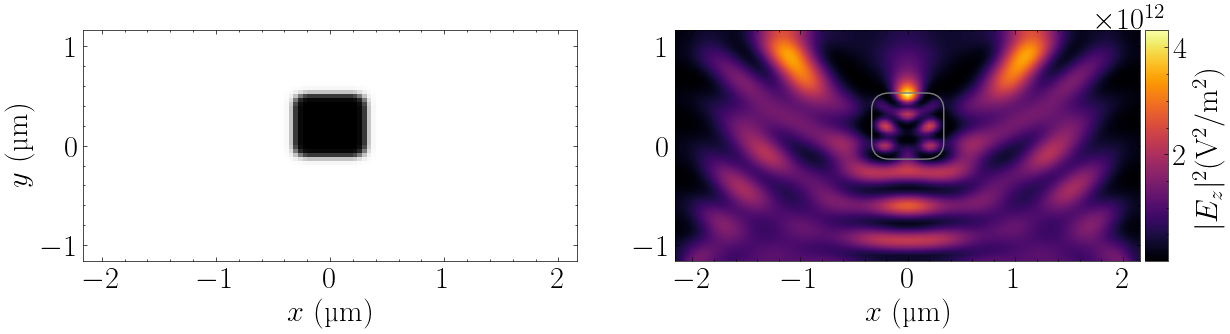

In [10]:
Ez, FOM = solver.solve_forward(DVini, DVini_part)

In [11]:
solver.calculate_forces()

Fx (pN/μm):  -5.358491428353318e-15
Fy (pN/μm):  2.9033675821767075


In [12]:
Fy_init = solver.dis_0.Fy

We call the solver to solve the Topology Optimization problem.

----------------------------------------------
Optimization iteration:  0
FOM:  1.0001266214869815
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


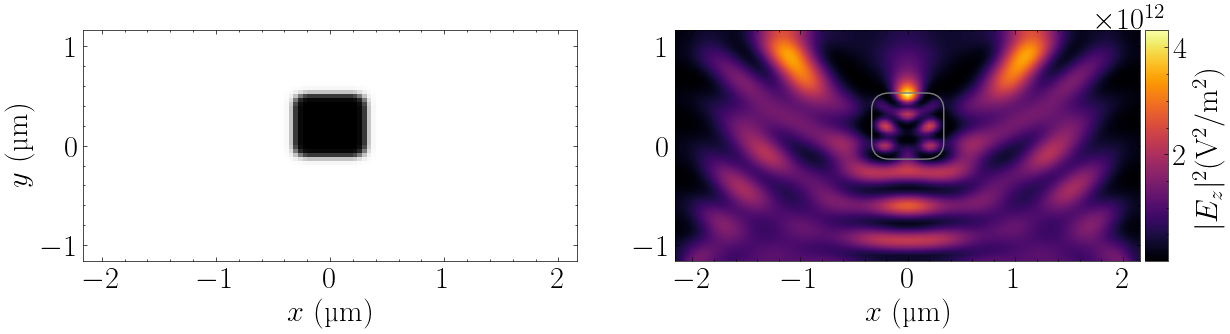

----------------------------------------------
Optimization iteration:  1
FOM:  (0.9007175380711501+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: 0.0007972645235000532
----------------------------------------------
Optimization iteration:  1
FOM:  1.1211803099656852
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


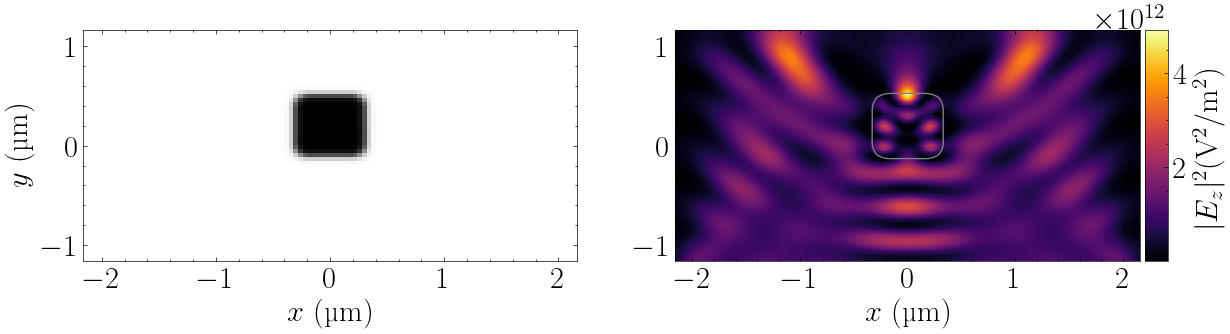

----------------------------------------------
Optimization iteration:  2
FOM:  (0.9006683395974385+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: 0.0007425995527094504
----------------------------------------------
Optimization iteration:  2
FOM:  1.4768507916967808
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


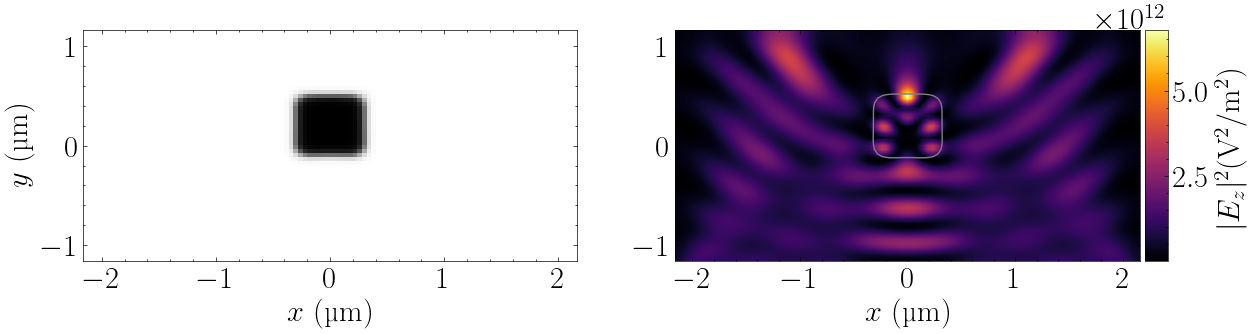

----------------------------------------------
Optimization iteration:  3
FOM:  (0.9005304712487257+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: 0.0005894124985840311
----------------------------------------------
Optimization iteration:  3
FOM:  1.8794242039494071
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


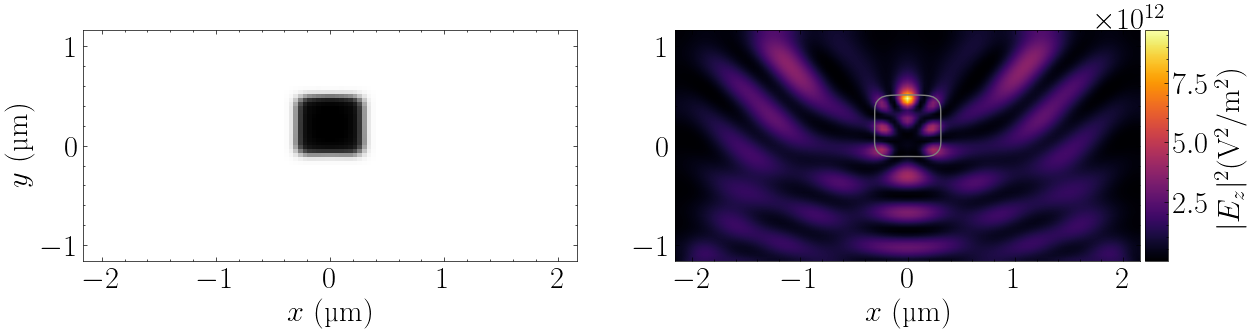

----------------------------------------------
Optimization iteration:  4
FOM:  (0.9001512215823545+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: 0.00016802398039386348
----------------------------------------------
Optimization iteration:  4
FOM:  1.7725649093432099
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


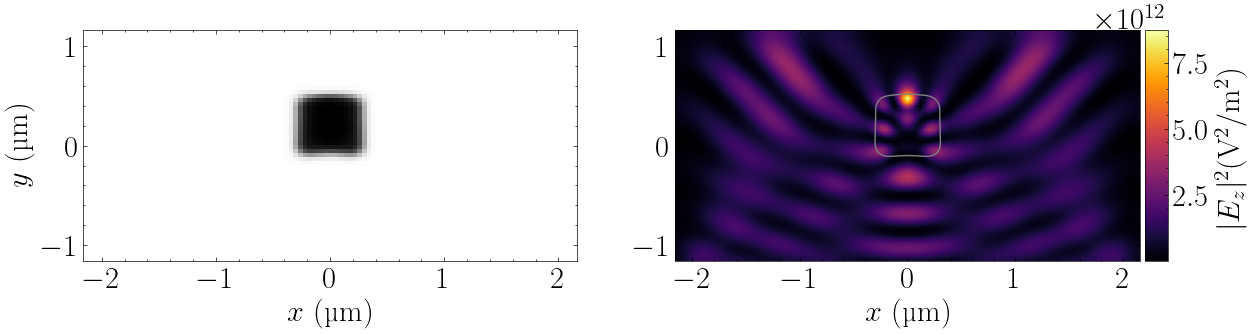

----------------------------------------------
Optimization iteration:  5
FOM:  (0.8998909455864275+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.00012117157063618045
----------------------------------------------
Optimization iteration:  5
FOM:  1.9677094648218112
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


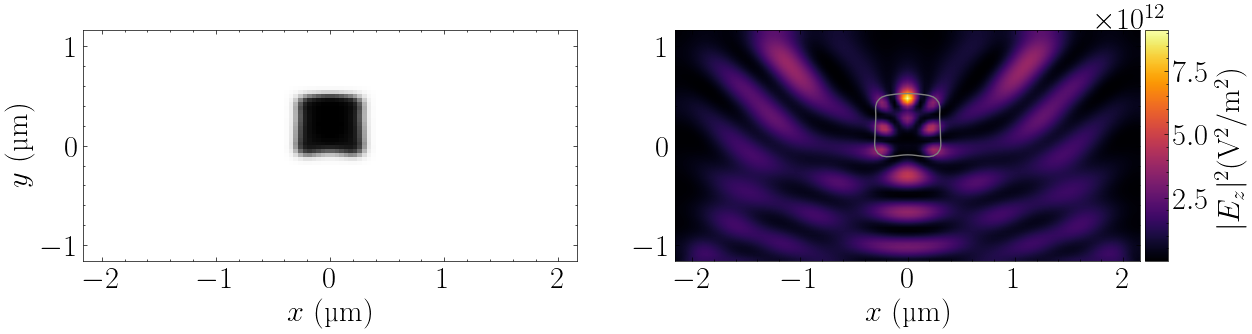

----------------------------------------------
Optimization iteration:  6
FOM:  (0.8999383005911206+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -6.855489875495163e-05
----------------------------------------------
Optimization iteration:  6
FOM:  2.1240806818586386
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


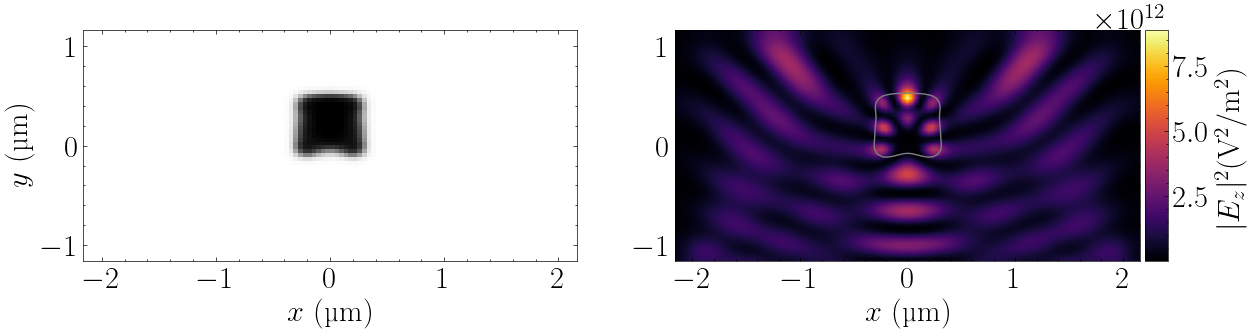

----------------------------------------------
Optimization iteration:  7
FOM:  (0.899910251570985+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -9.972047668332312e-05
----------------------------------------------
Optimization iteration:  7
FOM:  2.2321783708798413
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


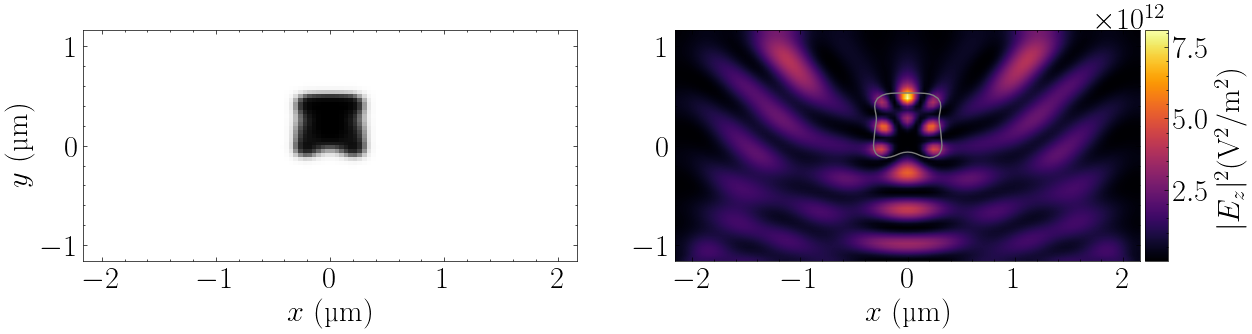

----------------------------------------------
Optimization iteration:  8
FOM:  (0.8998681509636446+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.00014649892928381765
----------------------------------------------
Optimization iteration:  8
FOM:  2.0358242152457318
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


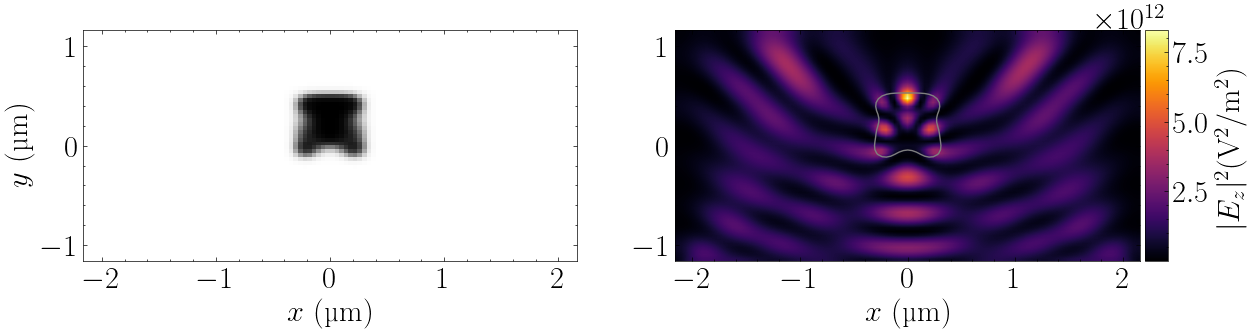

----------------------------------------------
Optimization iteration:  9
FOM:  (0.8990914421930936+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.001009508674340514
----------------------------------------------
Optimization iteration:  9
FOM:  2.2997327152908724
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


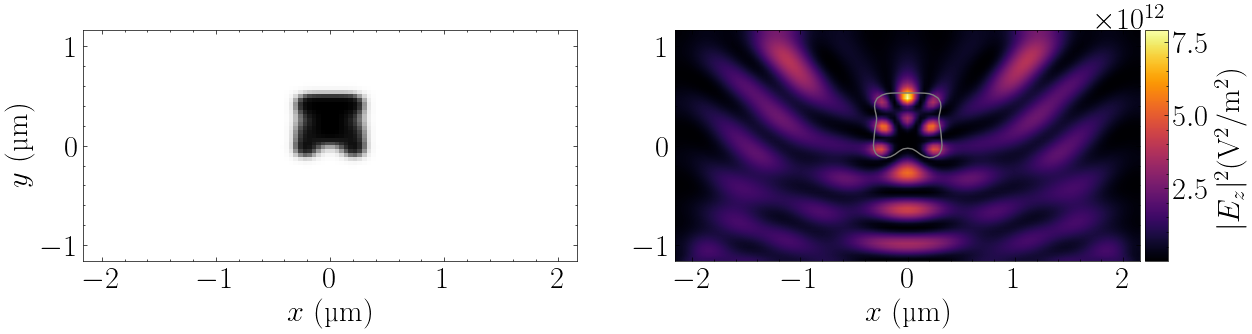

----------------------------------------------
Optimization iteration:  10
FOM:  (0.8995124182956288+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.0005417574493013808
----------------------------------------------
Optimization iteration:  10
FOM:  2.3729706349593918
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


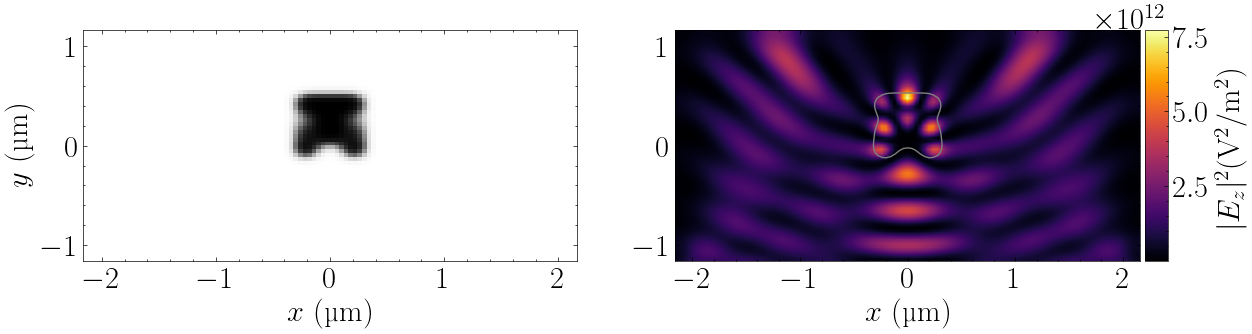

----------------------------------------------
Optimization iteration:  11
FOM:  (0.8992940706338467+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.0007843659623925822
----------------------------------------------
Optimization iteration:  11
FOM:  2.4733520992180305
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


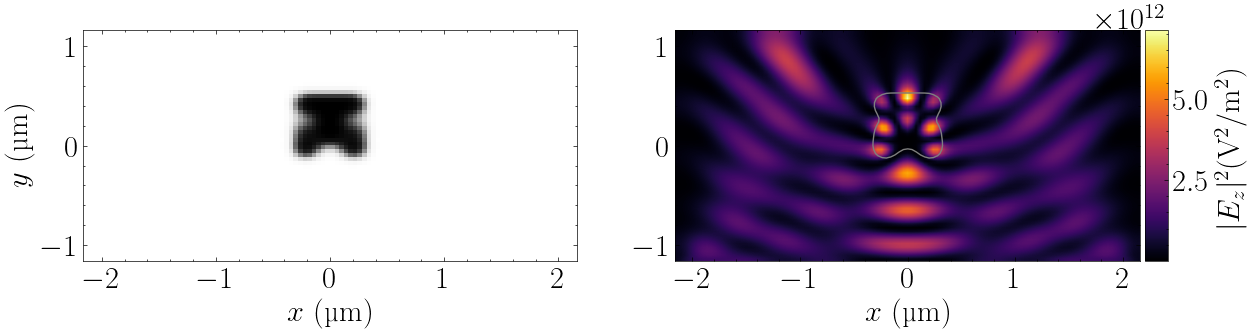

----------------------------------------------
Optimization iteration:  12
FOM:  (0.8994099455249351+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.0006556160834054254
----------------------------------------------
Optimization iteration:  12
FOM:  2.5625184447956912
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


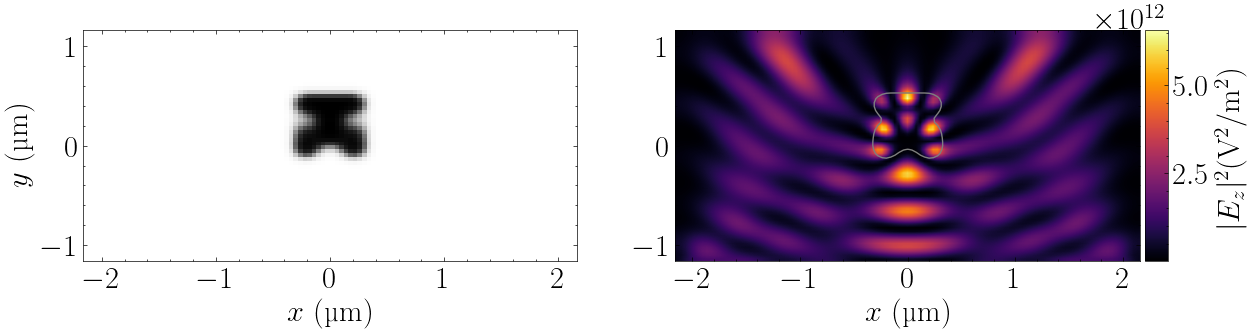

----------------------------------------------
Optimization iteration:  13
FOM:  (0.899292017695127+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.0007866470054144574
----------------------------------------------
Optimization iteration:  13
FOM:  2.640610168823798
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


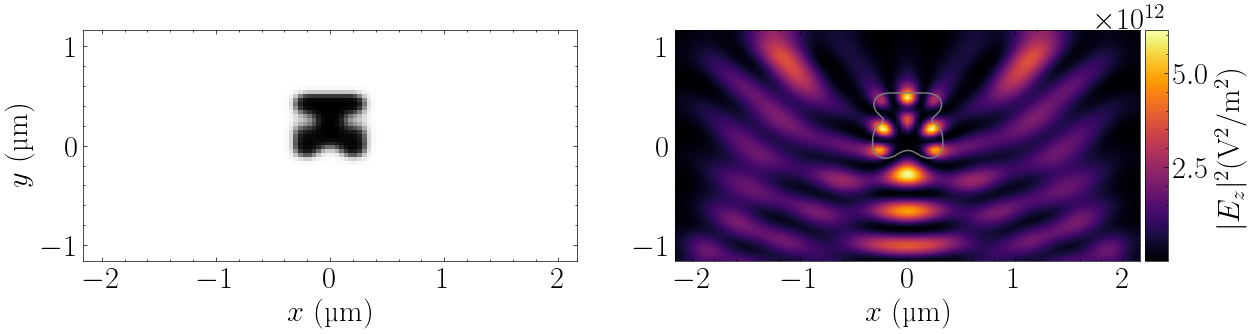

----------------------------------------------
Optimization iteration:  14
FOM:  (0.899360805273643+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.0007102163626188713
----------------------------------------------
Optimization iteration:  14
FOM:  2.6915733367013366
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


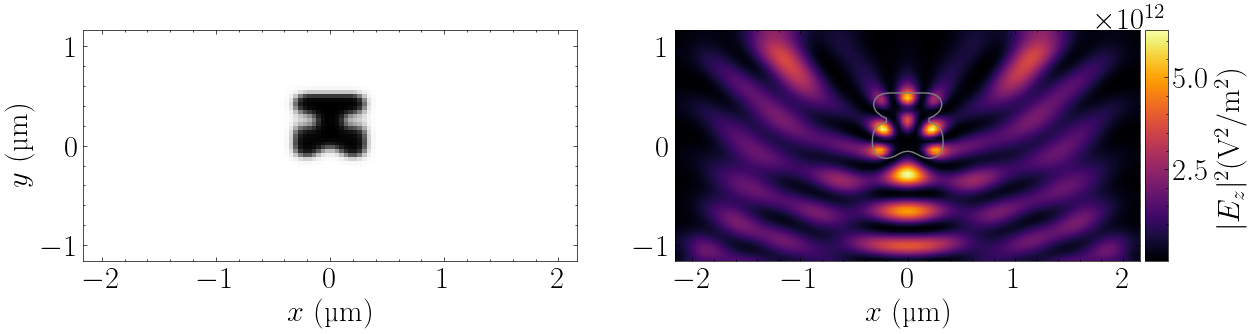

----------------------------------------------
Optimization iteration:  15
FOM:  (0.8993879313227071+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.0006800763081032329
----------------------------------------------
Optimization iteration:  15
FOM:  2.7219256175144753
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


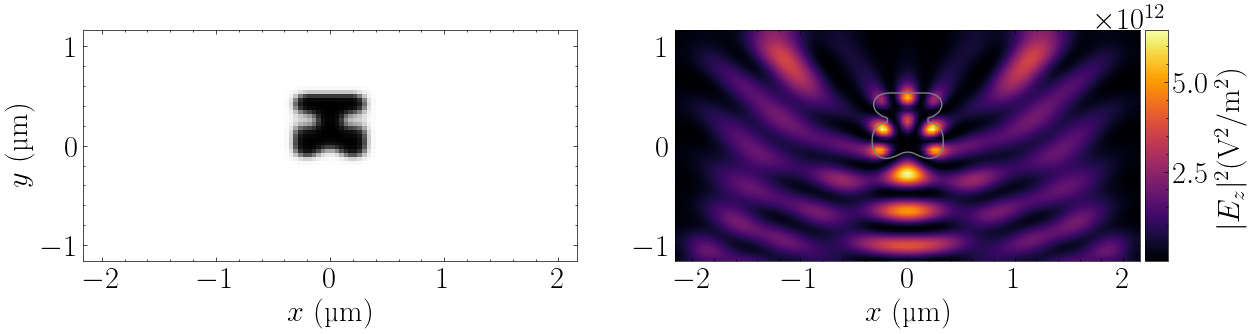

----------------------------------------------
Optimization iteration:  16
FOM:  (0.899509768888323+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.0005447012351966762
----------------------------------------------
Optimization iteration:  16
FOM:  2.7397970190836913
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


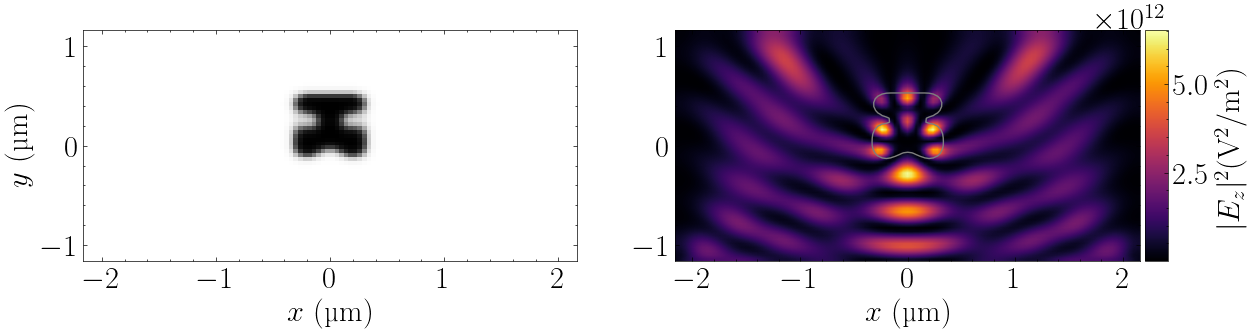

----------------------------------------------
Optimization iteration:  17
FOM:  (0.8994866438249064+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.0005703957501040296
----------------------------------------------
Optimization iteration:  17
FOM:  2.753733528117556
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


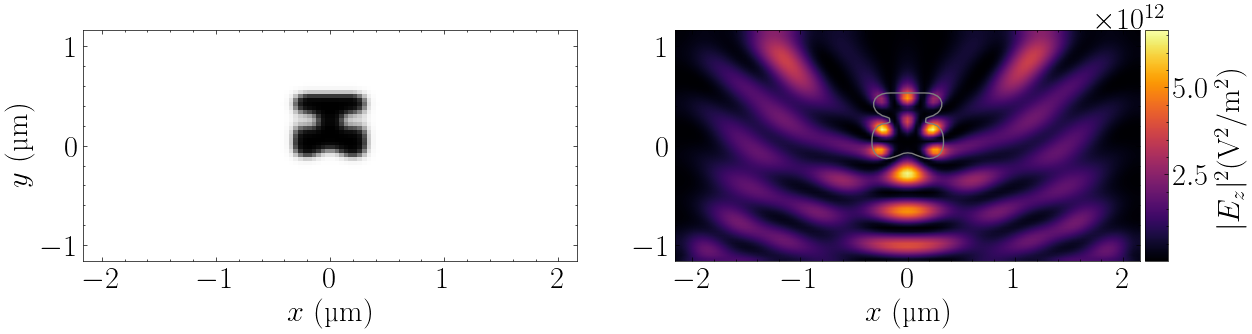

----------------------------------------------
Optimization iteration:  18
FOM:  (0.8995749669623694+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.00047225893070071103
----------------------------------------------
Optimization iteration:  18
FOM:  2.764561770901699
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


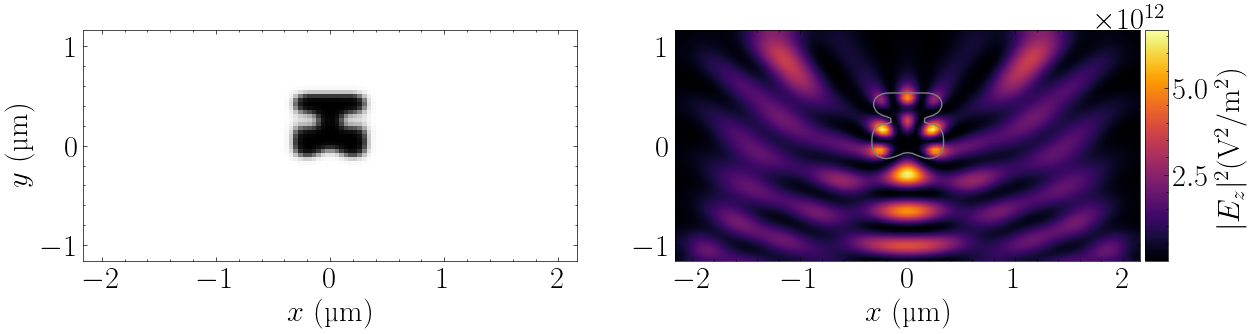

----------------------------------------------
Optimization iteration:  19
FOM:  (0.8995616216012061+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.0004870871097710043
----------------------------------------------
Optimization iteration:  19
FOM:  2.7708112675254317
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


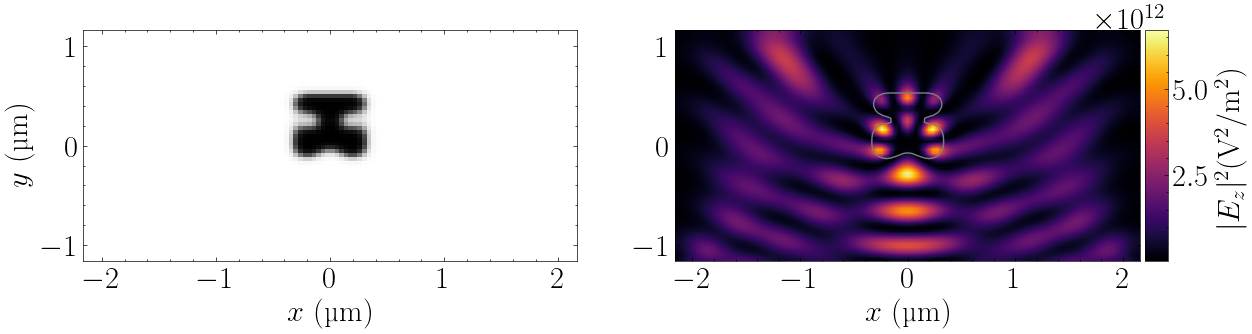

----------------------------------------------
Optimization iteration:  20
FOM:  (0.899590030989525+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.00045552112275008366
----------------------------------------------
Optimization iteration:  20
FOM:  2.774842761207333
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


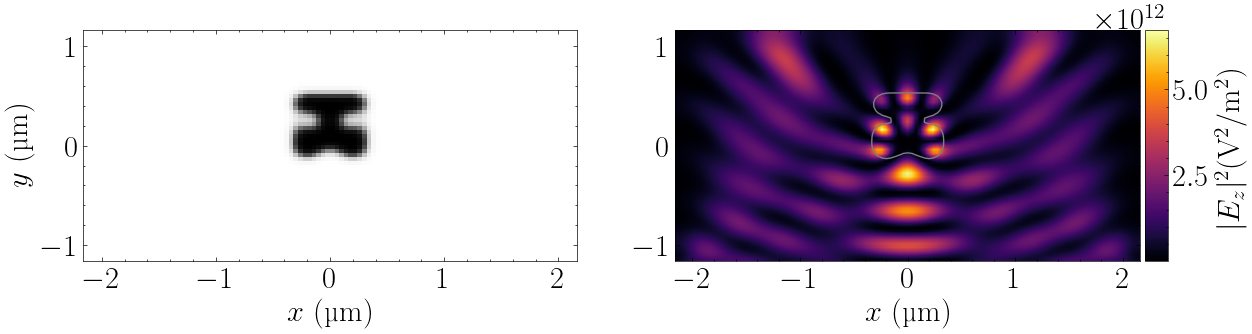

----------------------------------------------
Optimization iteration:  21
FOM:  (0.8995854983844506+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.00046055735061050705
----------------------------------------------
Optimization iteration:  21
FOM:  2.7774463523485045
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


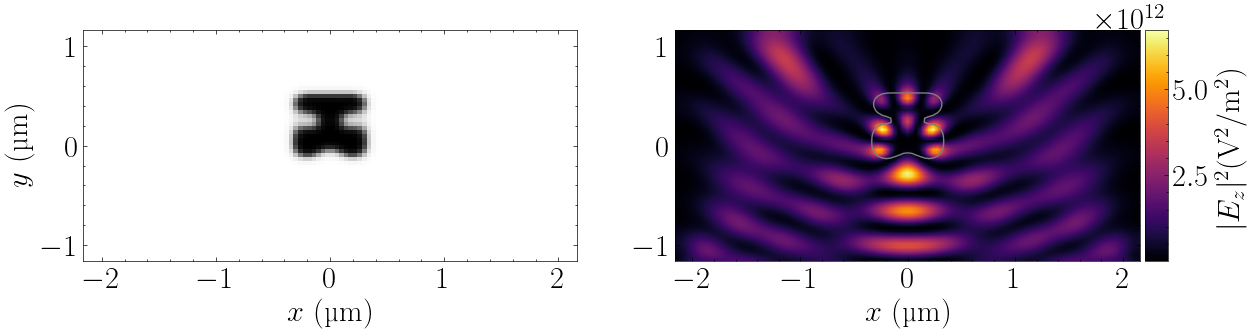

----------------------------------------------
Optimization iteration:  22
FOM:  (0.8995790018884507+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.0004677756794991951
----------------------------------------------
Optimization iteration:  22
FOM:  2.779436983194891
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


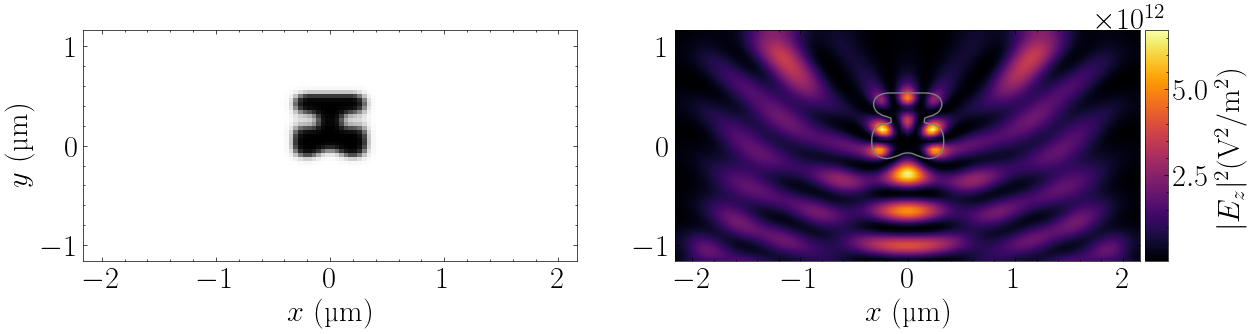

----------------------------------------------
Optimization iteration:  23
FOM:  (0.8995743371558628+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.0004729587157080594
----------------------------------------------
Optimization iteration:  23
FOM:  2.7815267793306706
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


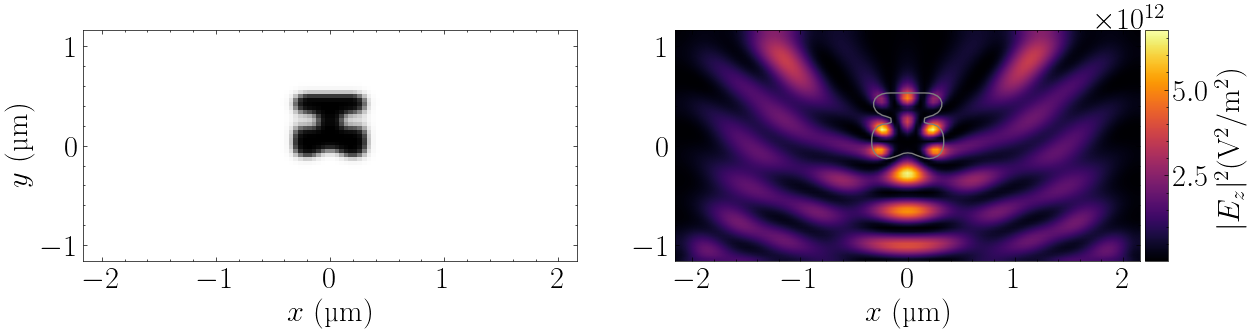

----------------------------------------------
Optimization iteration:  24
FOM:  (0.899572451399652+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.00047505400038665933
----------------------------------------------
Optimization iteration:  24
FOM:  2.7834771945520482
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


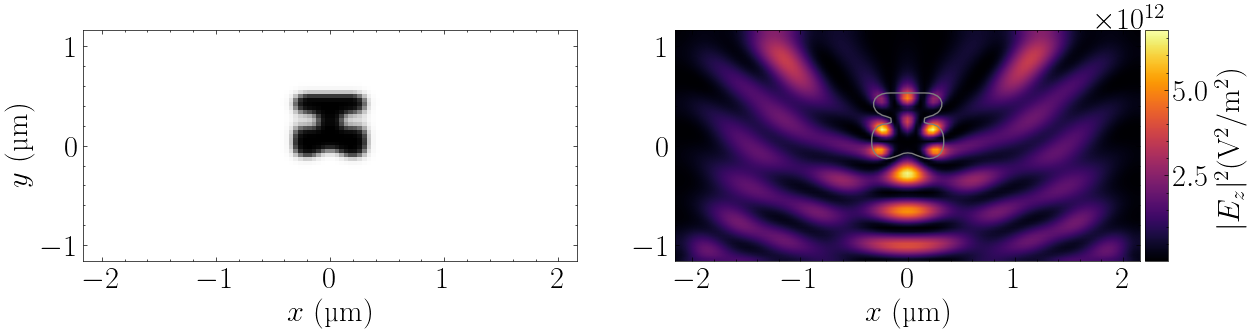

----------------------------------------------
Optimization iteration:  25
FOM:  (0.899571355711268+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.0004762714319244626
----------------------------------------------
Optimization iteration:  25
FOM:  2.784995324520589
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


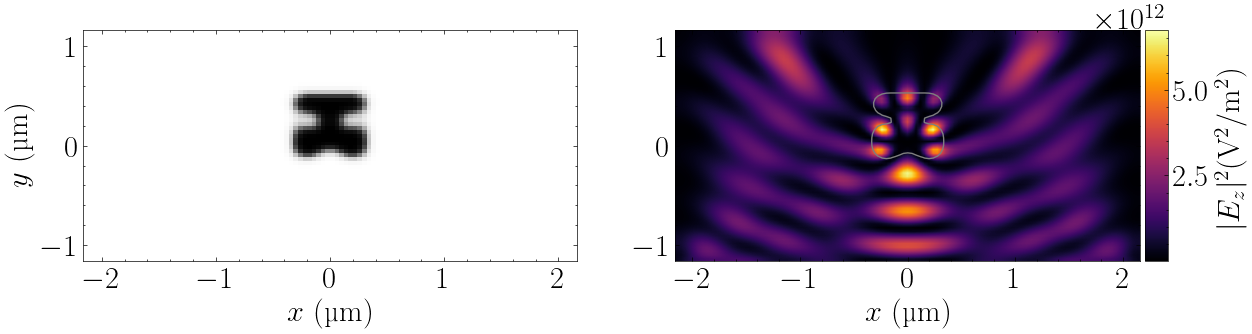

----------------------------------------------
Optimization iteration:  26
FOM:  (0.8995692639341003+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.00047859562877746364
----------------------------------------------
Optimization iteration:  26
FOM:  2.7865429633380585
Elapsed time in iteration: 0 min 3 s
----------------------------------------------


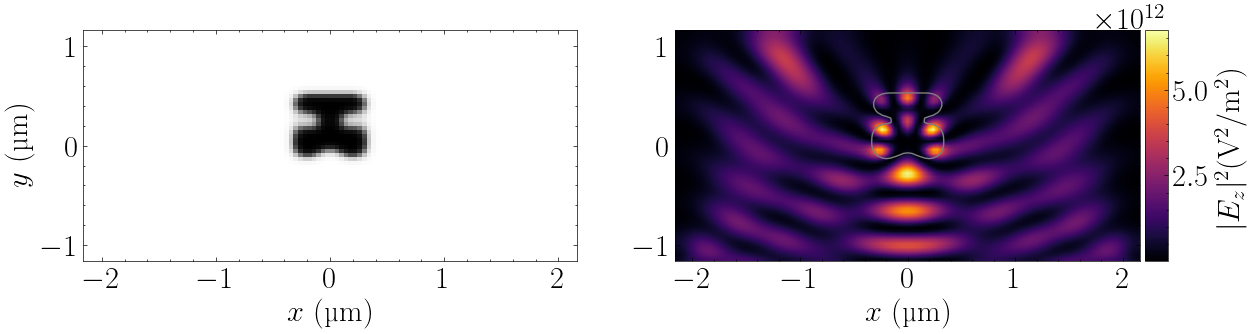

----------------------------------------------
Optimization iteration:  27
FOM:  (0.8995683307406631+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.000479632510374343
----------------------------------------------
Optimization iteration:  27
FOM:  2.788064357793565
Elapsed time in iteration: 0 min 3 s
----------------------------------------------


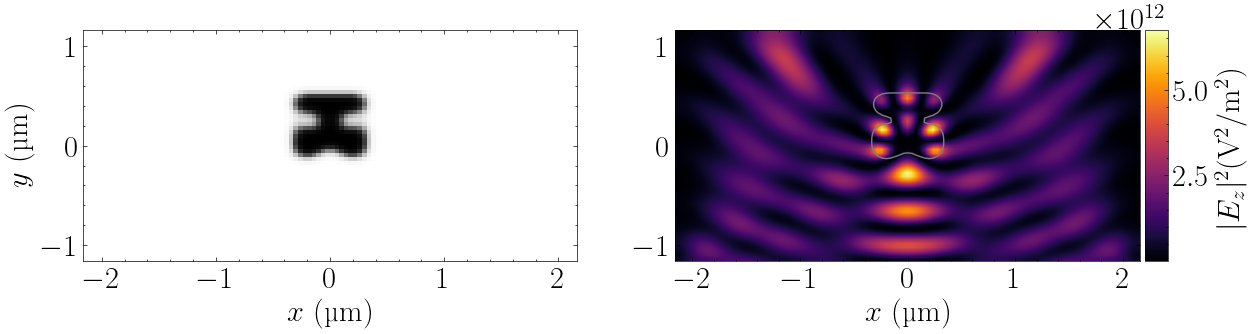

----------------------------------------------
Optimization iteration:  28
FOM:  (0.899569390663448+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.00047845481839114967
----------------------------------------------
Optimization iteration:  28
FOM:  2.7892118701753534
Elapsed time in iteration: 0 min 3 s
----------------------------------------------


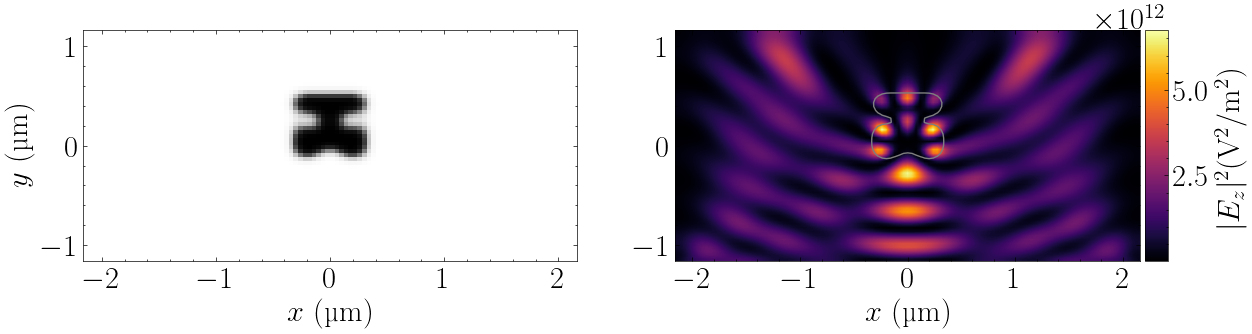

----------------------------------------------
Optimization iteration:  29
FOM:  (0.8995702256734267+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.00047752702952590873
----------------------------------------------
Optimization iteration:  29
FOM:  2.790171932752299
Elapsed time in iteration: 0 min 3 s
----------------------------------------------


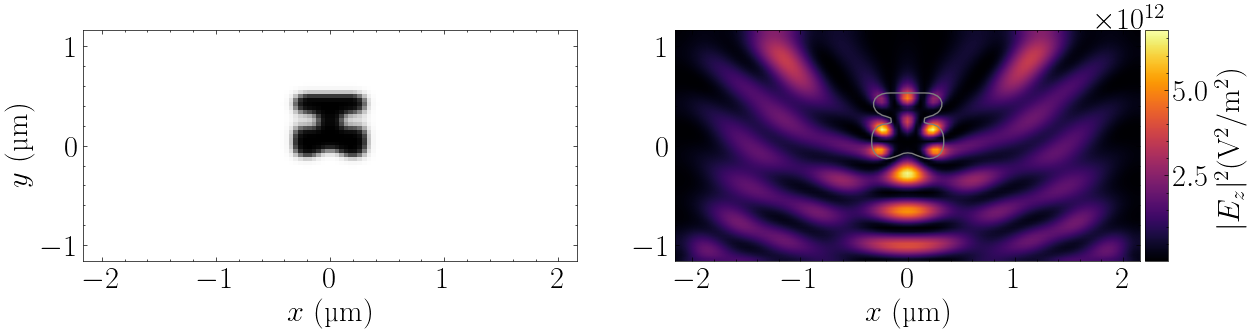

----------------------------------------------
Optimization iteration:  30
FOM:  (0.8995688288782273+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.0004790790241919011
----------------------------------------------
Optimization iteration:  30
FOM:  2.791177226594155
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


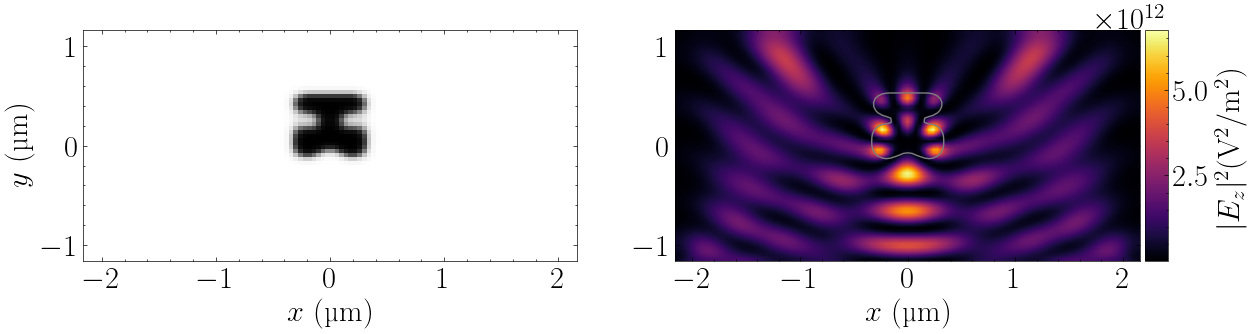

----------------------------------------------
Optimization iteration:  31
FOM:  (0.8995695337993952+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.00047829577844980977
----------------------------------------------
Optimization iteration:  31
FOM:  2.7922273036721794
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


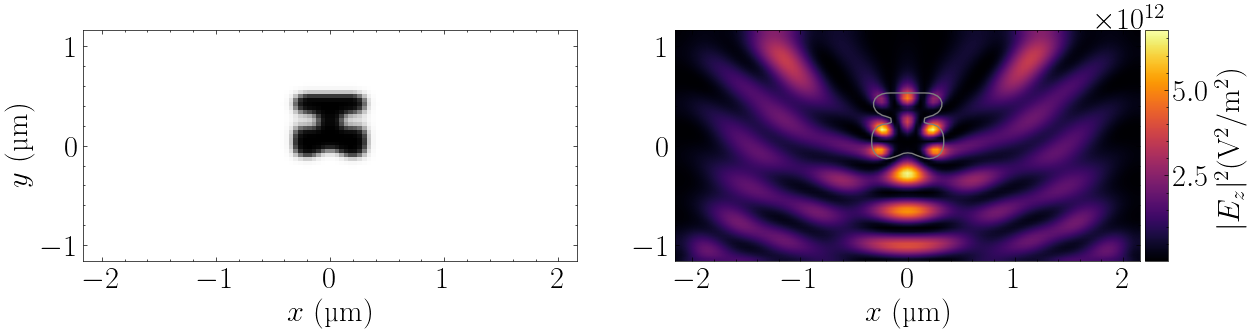

----------------------------------------------
Optimization iteration:  32
FOM:  (0.8995710043417494+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.00047666184250067585
----------------------------------------------
Optimization iteration:  32
FOM:  2.7932127497394017
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


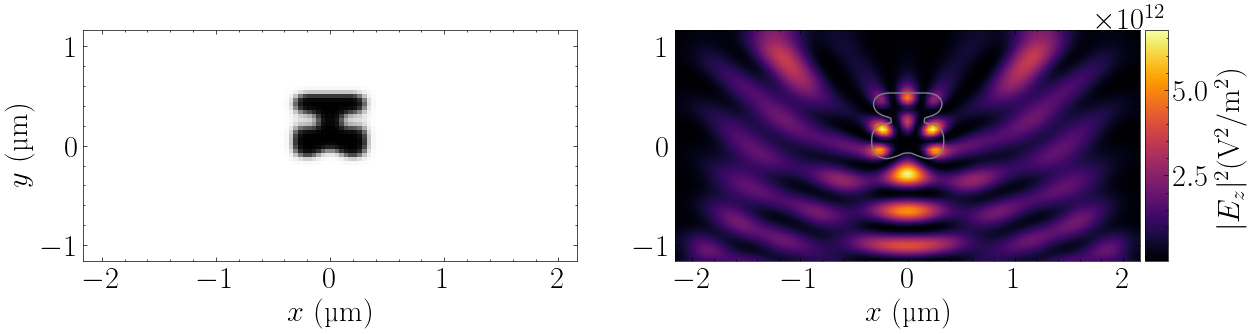

----------------------------------------------
Optimization iteration:  33
FOM:  (0.8995730917340052+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.00047434251777198376
----------------------------------------------
Optimization iteration:  33
FOM:  2.79417913941145
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


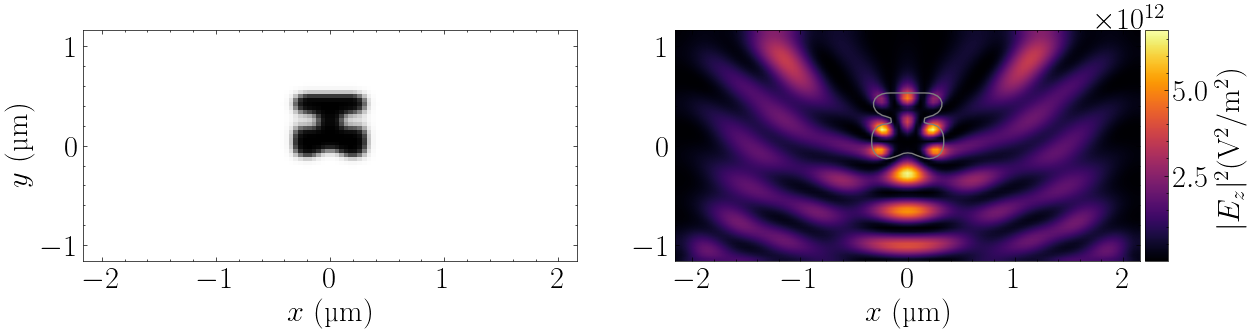

----------------------------------------------
Optimization iteration:  34
FOM:  (0.8995759632309765+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.0004711519655816362
----------------------------------------------
Optimization iteration:  34
FOM:  2.7951961778519556
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


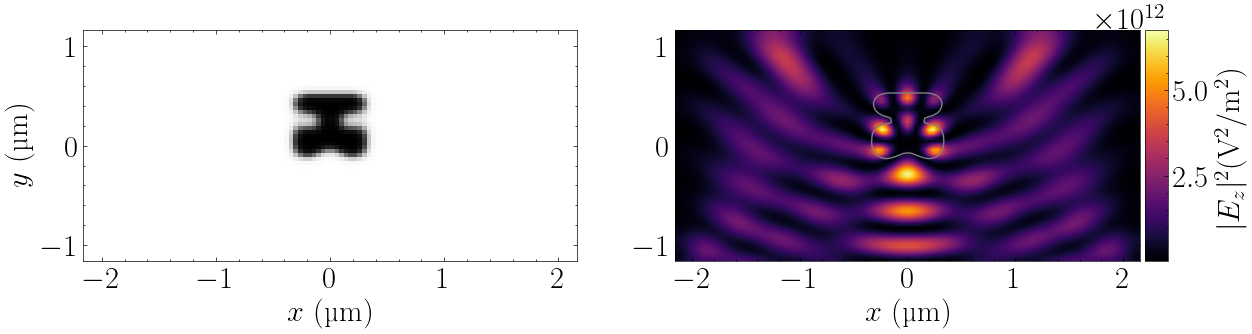

----------------------------------------------
Optimization iteration:  35
FOM:  (0.8995789222327479+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.0004678641858356524
----------------------------------------------
Optimization iteration:  35
FOM:  2.796270904761361
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


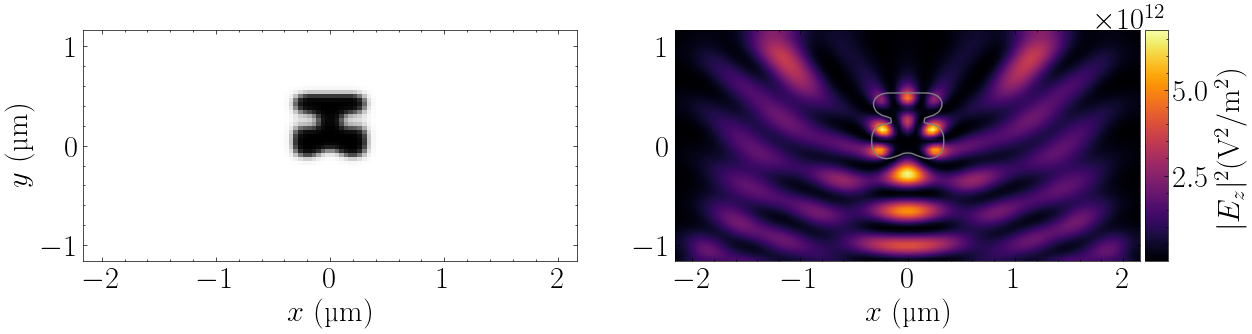

----------------------------------------------
Optimization iteration:  36
FOM:  (0.8995819807598783+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.00046446582235749726
----------------------------------------------
Optimization iteration:  36
FOM:  2.7970824140543877
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


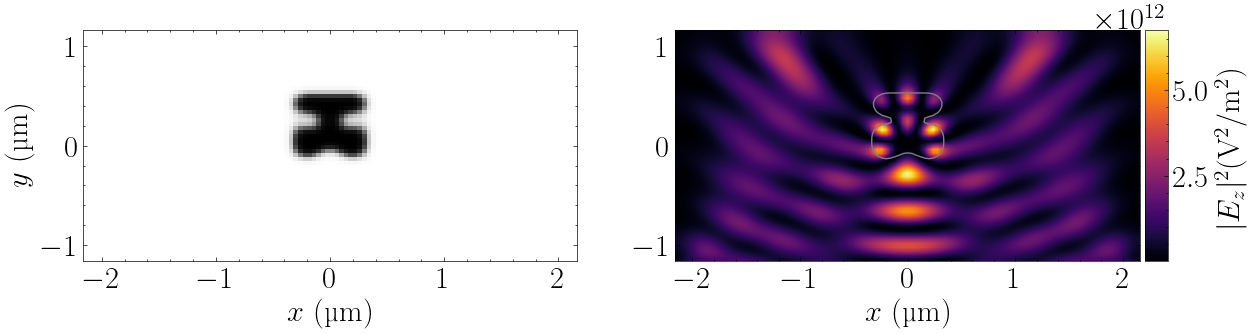

----------------------------------------------
Optimization iteration:  37
FOM:  (0.8995819933024328+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.00046445188618577445
----------------------------------------------
Optimization iteration:  37
FOM:  2.7978176337121448
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


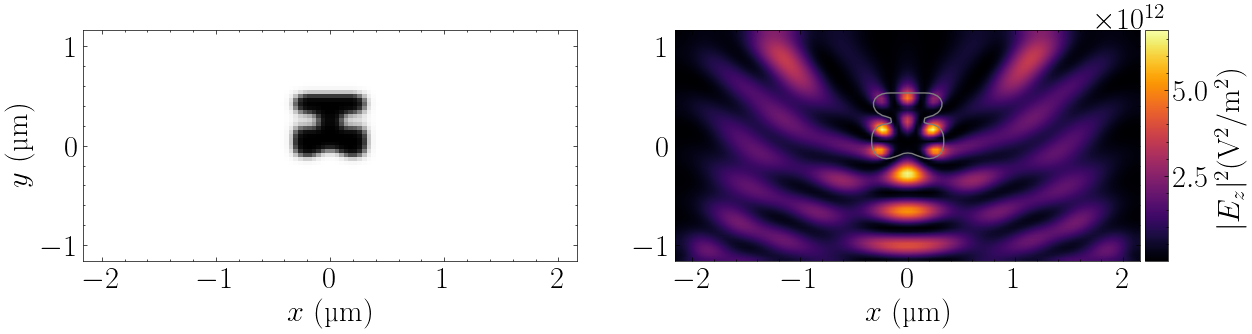

----------------------------------------------
Optimization iteration:  38
FOM:  (0.8995862713978103+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.00045969844687743233
----------------------------------------------
Optimization iteration:  38
FOM:  2.7985654119252503
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


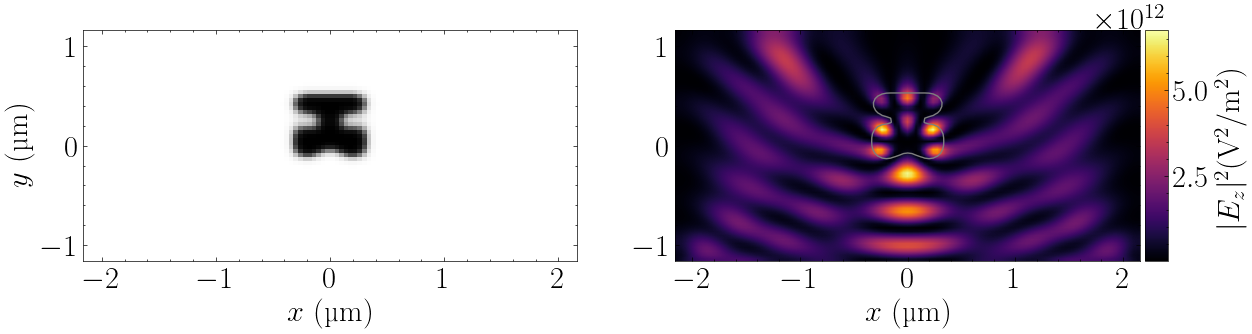

----------------------------------------------
Optimization iteration:  39
FOM:  (0.8995914898860048+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.0004539001266613675
----------------------------------------------
Optimization iteration:  39
FOM:  2.7992479865912085
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


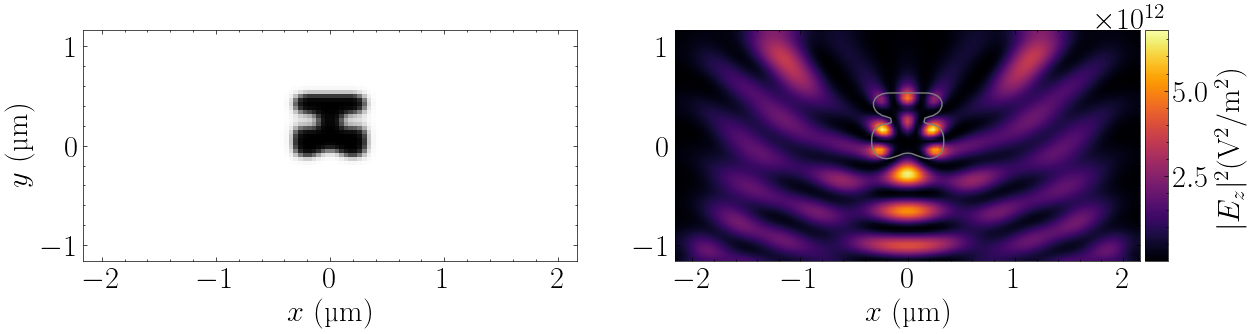

----------------------------------------------
Optimization iteration:  40
FOM:  (0.8995994272299911+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.0004450808555654816
----------------------------------------------
Optimization iteration:  40
FOM:  2.79984346088859
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


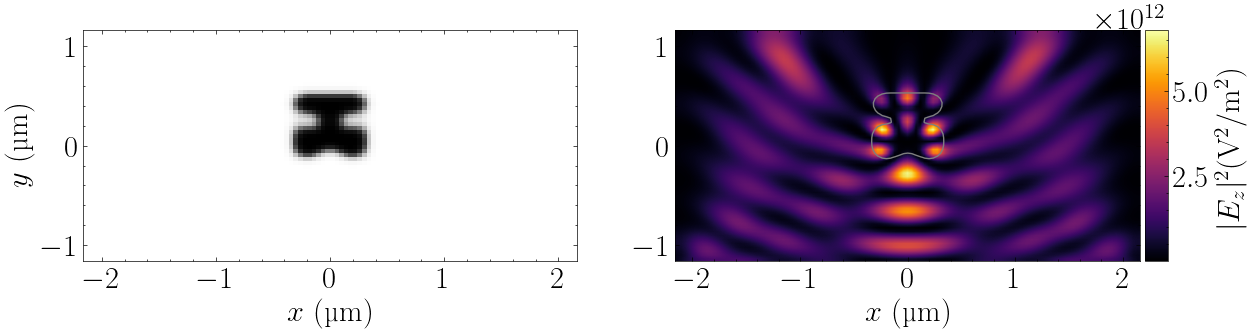

----------------------------------------------
Optimization iteration:  41
FOM:  (0.8996081932429616+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.00043534084115380724
----------------------------------------------
Optimization iteration:  41
FOM:  2.800300894263684
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


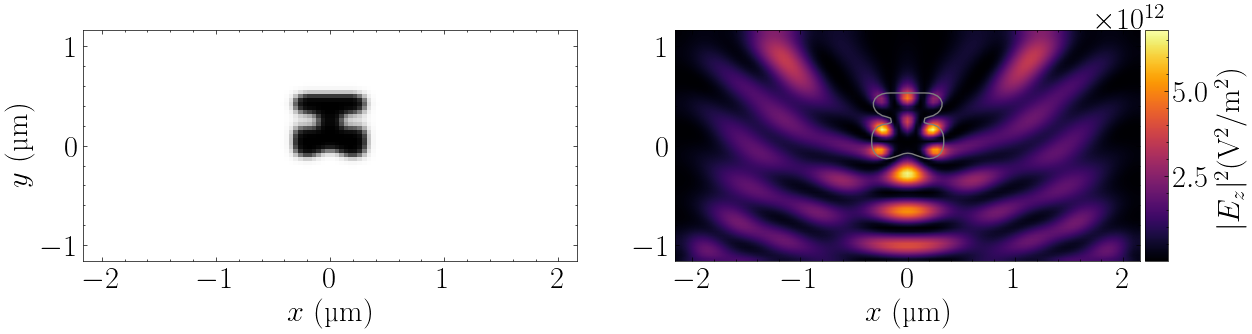

NEW BETA:  7.5
NEW ALPHA:  0.1
----------------------------------------------
Optimization iteration:  42
FOM:  (0.8995275515590794+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.0005249427121340528
----------------------------------------------
Optimization iteration:  42
FOM:  2.82224238238946
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


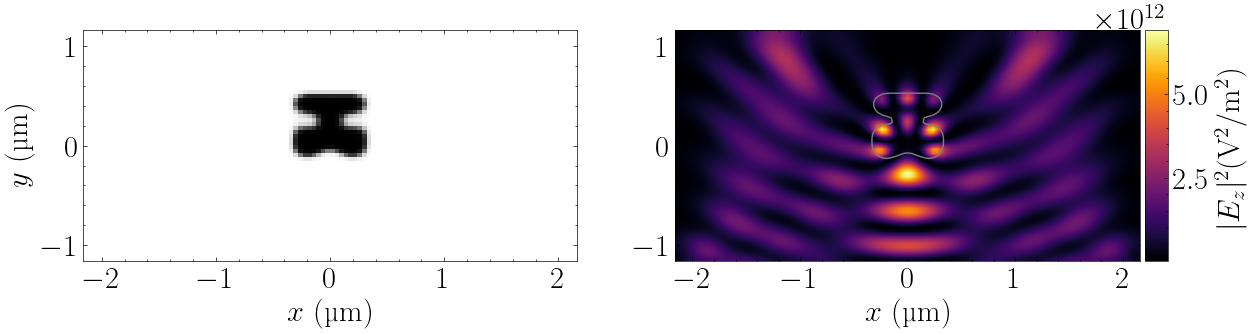

----------------------------------------------
Optimization iteration:  43
FOM:  (0.899535399998733+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.0005162222236300264
----------------------------------------------
Optimization iteration:  43
FOM:  2.8444235075836715
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


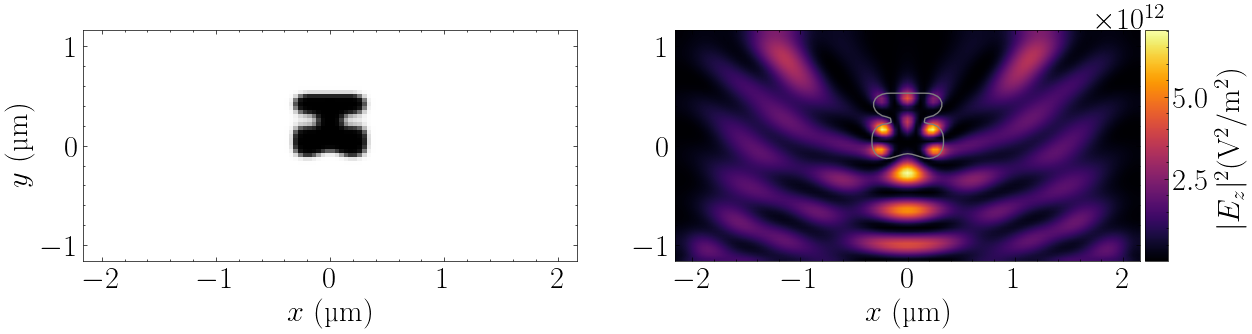

----------------------------------------------
Optimization iteration:  44
FOM:  (0.8997231750878175+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.00030758323575833896
----------------------------------------------
Optimization iteration:  44
FOM:  2.8467504452256116
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


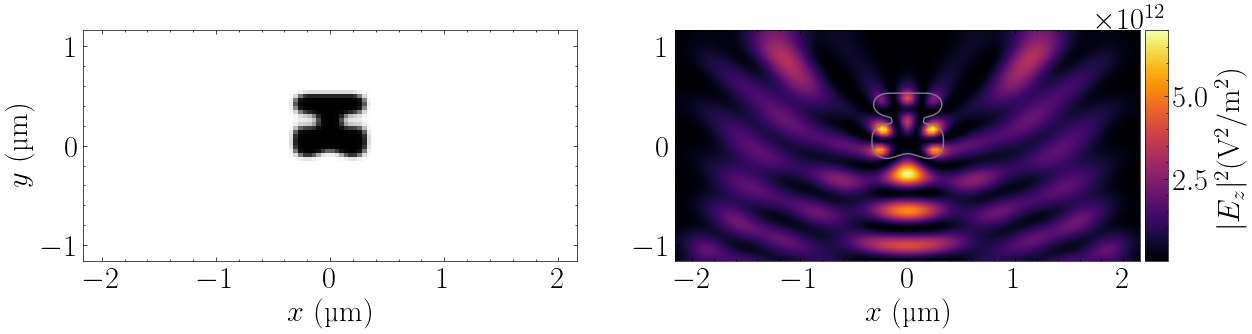

----------------------------------------------
Optimization iteration:  45
FOM:  (0.8996541300810698+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.00038429990992251543
----------------------------------------------
Optimization iteration:  45
FOM:  2.8503275269165553
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


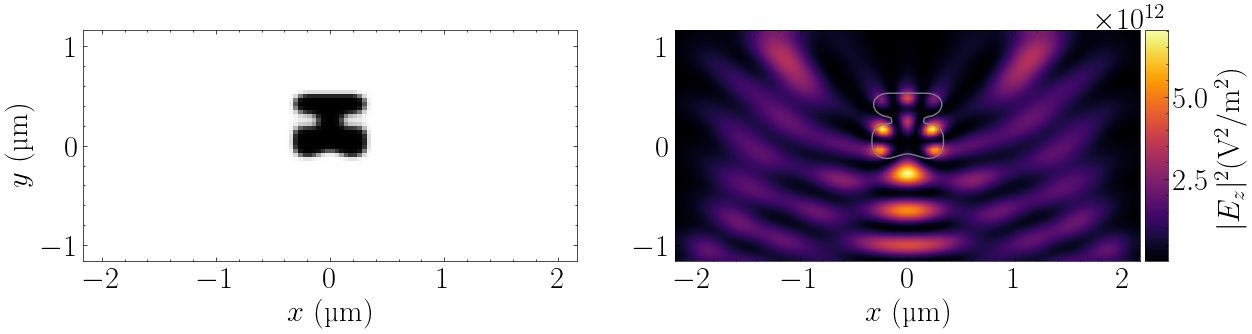

----------------------------------------------
Optimization iteration:  46
FOM:  (0.8997088276336916+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.00032352485145375413
----------------------------------------------
Optimization iteration:  46
FOM:  2.85125168115886
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


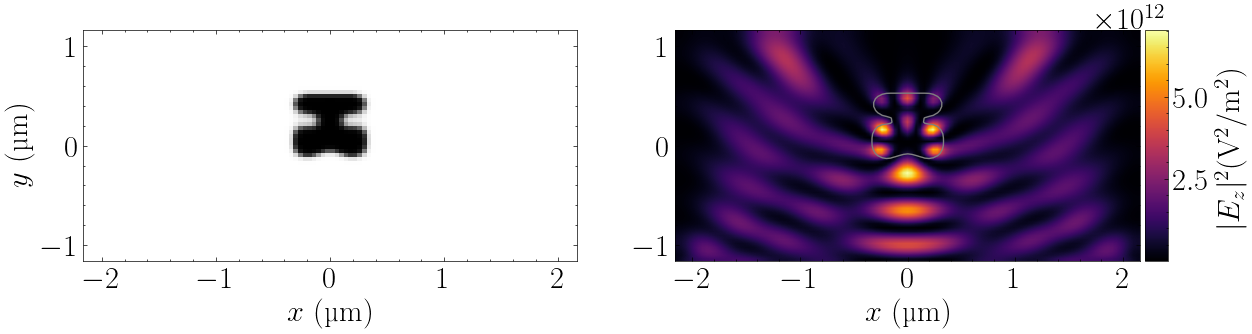

----------------------------------------------
Optimization iteration:  47
FOM:  (0.8997017634791619+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.00033137391204239743
----------------------------------------------
Optimization iteration:  47
FOM:  2.8519978071009096
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


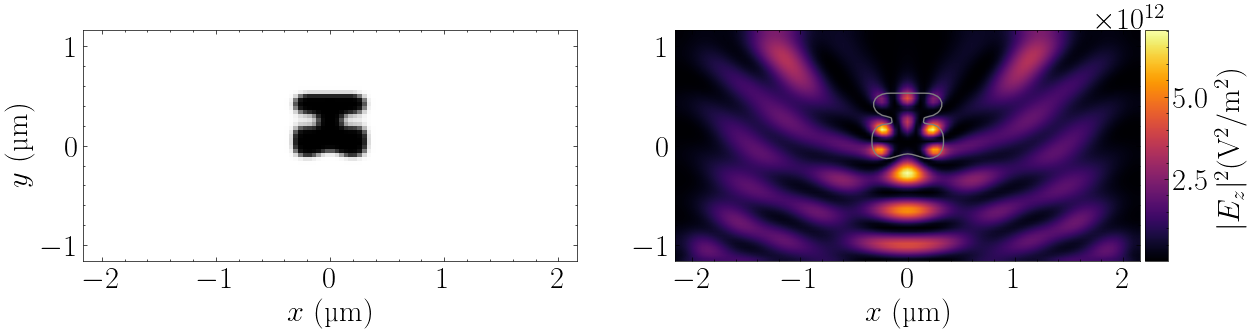

----------------------------------------------
Optimization iteration:  48
FOM:  (0.8997029870796001+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.0003300143559999599
----------------------------------------------
Optimization iteration:  48
FOM:  2.852747330579302
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


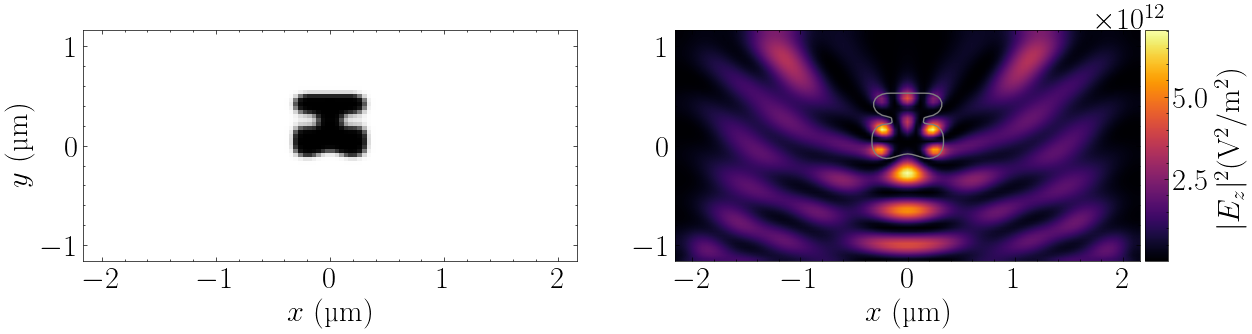

----------------------------------------------
Optimization iteration:  49
FOM:  (0.8997031411062871+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.00032984321523654714
----------------------------------------------
Optimization iteration:  49
FOM:  2.8534874565934576
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


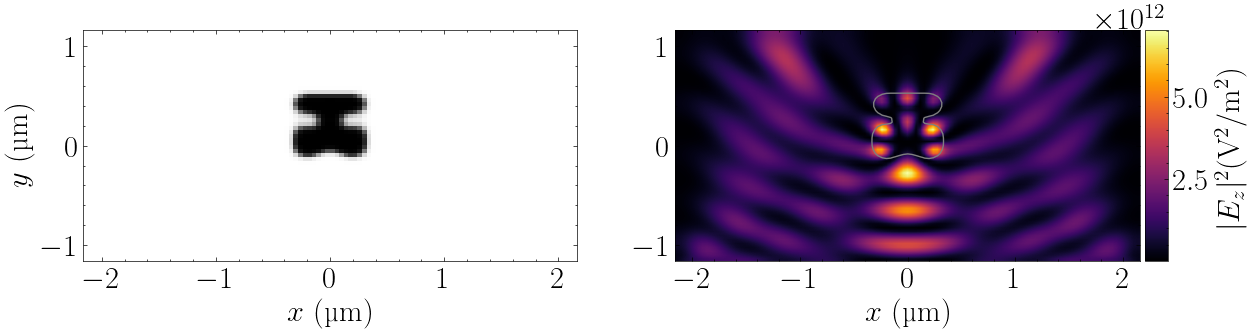

----------------------------------------------
Optimization iteration:  50
FOM:  (0.8997031873019613+0j)
Elapsed time in iteration: 0 min 0 s
----------------------------------------------
Connectivity constraint: -0.0003297918867096862
----------------------------------------------
Total optimization time: 2 min 1 s
----------------------------------------------


In [13]:
dVs_part = solver.optimize(maxItr)

### Plotting the iteration history

Now that the optimization is done, we can check the minimization and convergence of the FOM and the behavior of the constraints.

----------------------------------------------
Iteration history
----------------------------------------------


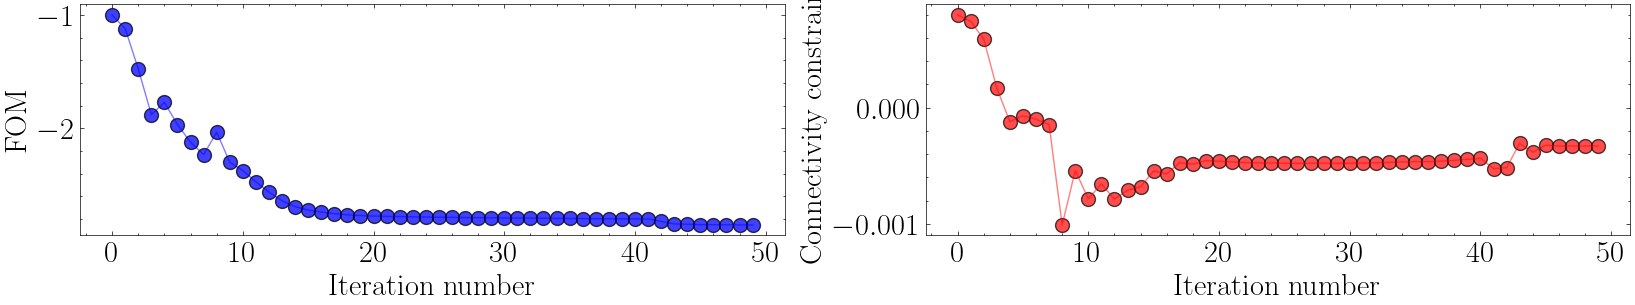

In [14]:
solver.iteration_history()

As expected, the FOM is correctly minimized and the connectivity constraint is fullfilled, since it's value is below zero.

Note that since in this example we run a low number of iterations, the design only goes through the first continuation step ($\beta \to 7.5$). Nevertheless, for more iterations the design will go through more continuation steps and will eventually converge towards a binary design.

### Evaluating the performance of the final binarized design

Now we evaluate the final optimized design as a binary structure, by pushing the continuation parameter to infinity: $\beta \to \infty$.

In [15]:
beta = 1E99 # beta = infty

In [16]:
solver = freq_top_opt_2D( center,
                          dVElmIdx,
                          dVElmIdx_part,
                          dVElmIdx_part_pad,
                          nElx, 
                          nEly,
                          DVini,
                          DVini_part,  
                          eps, 
                          wl,  
                          fR,
                          eta, 
                          beta,
                          scaling,
                          part_shape,
                          part_size,
                          eps_part
                        )

FOM:  2.946985841195272
Elapsed time in iteration: 0 min 2 s
----------------------------------------------


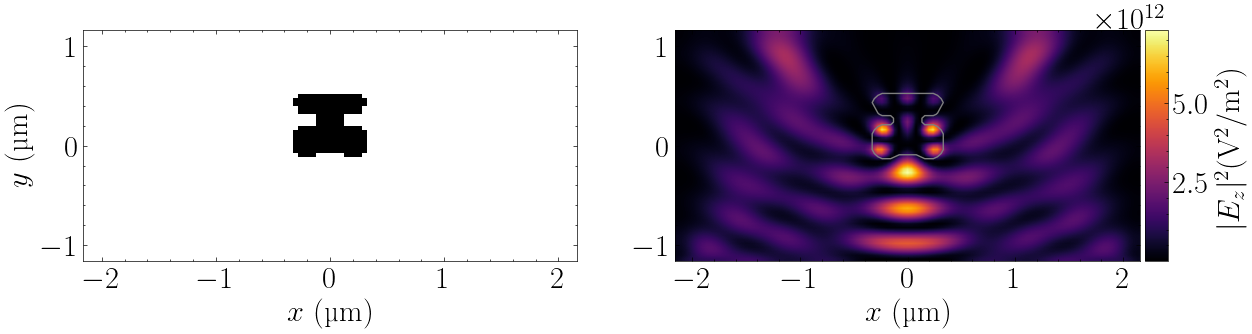

In [17]:
Ez, FOM = solver.solve_forward(DVini, dVs_part)

As we can see from the intensity profile, this design acts as a reflector, since there is almost no field intensity above the particle. This means that the particle reflects the incoming wave to harness the radiation pressure by exchanging linear momentum with the incoming plane-wave. This should result in a stronger force towards the positive $y$ direction. Let's check that:

In [18]:
solver.calculate_forces()

Fx (pN/μm):  5.492828414332962e-15
Fy (pN/μm):  8.555099896989875


In [19]:
Fy_final = solver.dis_0.Fy

In [20]:
print("Increase in vertical force on the particle: ", Fy_final/Fy_init)

Increase in vertical force on the particle:  2.9466127367089907


By comparing the initial and final designs, we see that the optimized design **has increased the vertical force by almost 3 times, compared to the baseline design**!